## Отчет по лабораторной работе № 8 по теме: "Сверточные нейронные сети"
    Цель: решение задачи классификации рукописных цифр с помощью сверточной нейронной сети.
    Исходные данные: DataSet CIFAR-10.
    Набор данных содержит 60000 цветных изображений размером 32x32.
    Все изображения делятся на 10 классов (по 6000 изображений в каждом).
    Классы изображений:самолеты, автомобили, птицы, коты, олени, собаки, лягушки, лошади, корабли, грузовики.
    Набор данных для обучения содержит 50000 картинок (5 комплектов по 10000 изображений).
    Набор данных для проверки содержит 10000 картинок (по 1000 случайно выбранных изображений каждого из 10 класса).

![Initial data](id.jpg)

### Преобразование данных
```python
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 

num_classes = np.unique(y_train).shape[0]
x_train=x_train.astype('float32')
x_train/=255
y_train = utils.to_categorical(y_train,  num_classes)

x_test=x_test.astype('float32')
x_test/=255
y_test = utils.to_categorical(y_test,  num_classes)
```

### Модель
```python
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding = 'same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3),padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
```

![Arch](mdl1.jpg)

### Статистика обучения

![Arch](stat1.jpg)

### Проверка модели

![Arch](prd1.jpg)
    Модель показала точность 76% на тестовом наборе данных и правильно классифицировала 8 из 10 изображений 
    из тестового набора данных правильно.
![Arch](stat2.jpg)   
![Arch](prd2.jpg)
    С увеличением количества эпох точность выросла и достигла 77% на 28 эпохе обучения. Оптимальным 
    количеством эпох для данной модели будет 30. Модель ошиблась на тех же изображениях. 
### Построение модели, состоящей из 6 сверточных слоев.
```python
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding = 'same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3),padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
          
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(256, kernel_size=(3, 3),padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.25))
          
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
```

![Arch](mdl2.jpg) 

### Статистика обучения

![Arch](stat3.jpg)

### Проверка модели

![Arch](prd3.jpg)
    Модель показала 81% на 75 эпохе обучения. Оптимальным количеством эпох для данной модели 
    будет 80. Модель правильно классифицировала изображения из тестового набора данных.

## Литература:
* Keras. Веб-сайт. KerasTuner. — Режим доступа:[keras.io](https://keras.io/keras_tuner/),свободный. — Загл. с экрана.
* Habr. Веб-сайт. Глубокое обучение для новичков: распознаем рукописные цифры. — Режим доступа:[habr.com](https://habr.com/ru/company/wunderfund/blog/314242/),свободный. — Загл. с экрана. 

In [1]:
!nvidia-smi

Thu Dec  2 21:48:53 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 440.64.00    CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:1A:00.0 Off |                    0 |
| N/A   41C    P0    58W / 300W |  32507MiB / 32510MiB |     13%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-SXM2...  Off  | 00000000:1C:00.0 Off |                    0 |
| N/A   35C    P0    57W / 300W |    318MiB / 32510MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

In [2]:
#Резервирование видеокарты
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '2' 

In [1]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import numpy as np
import glob
import random
from PIL import Image

(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [6]:
y_test[:11]

array([[3],
       [8],
       [8],
       [0],
       [6],
       [6],
       [1],
       [6],
       [3],
       [1],
       [0]], dtype=uint8)

([], <a list of 0 Text yticklabel objects>)

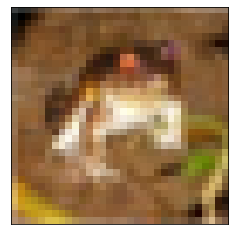

In [4]:
plt.imshow(x_train[0], cmap = 'binary', interpolation = 'nearest')
plt.xticks([])
plt.yticks([])

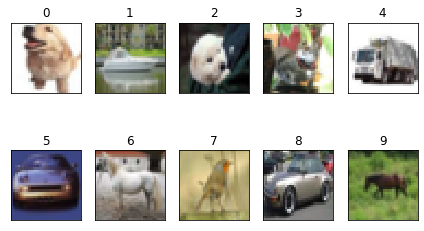

In [5]:
fig = plt.figure()

for i in range(10):
    k = random.randint(0, 50000)
    num=i+1   
    ax = fig.add_subplot(2,5,num)
    ax.imshow(x_train[k], cmap=plt.get_cmap('gray'))
    ax.set_title(i)
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()
plt.show()

##### Обучение нейросети на тренировочных данных из CIFAR-10.

In [4]:
from tensorflow.keras.datasets import cifar10 # subroutines for fetching the CIFAR-10 dataset
from tensorflow.keras.models import Model # basic class for specifying and training a neural network
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
import numpy as np
from tensorflow import keras
import time

start = time.time()

(x_train, y_train), (x_test, y_test) = cifar10.load_data() # fetch CIFAR-10 data

num_classes = np.unique(y_train).shape[0] # there are 10 image classes
x_train=x_train.astype('float32')
x_train/=255
y_train = utils.to_categorical(y_train,  num_classes)

x_test=x_test.astype('float32')
x_test/=255
y_test = utils.to_categorical(y_test,  num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding = 'same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3),padding = 'same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

sgd = SGD(learning_rate = 0.1, momentum = 0.9, nesterov = True)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
# Арихитектура нейронной сети
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 15, 15, 64)        0

In [8]:
tmKR = time.time()

history = model.fit(x_train, y_train,
              epochs= 20,
              validation_data=(x_test, y_test),
              shuffle=True)

tmKR = time.time() - tmKR
print("Keras training time : {:.2f} [sec]".format(tmKR))

Epoch 1/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5148 - accuracy: 0.4467 - val_loss: 1.1693 - val_accuracy: 0.5758
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1192 - accuracy: 0.6019 - val_loss: 0.9484 - val_accuracy: 0.6603
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9579 - accuracy: 0.6603 - val_loss: 0.8503 - val_accuracy: 0.6999
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8606 - accuracy: 0.6993 - val_loss: 0.8474 - val_accuracy: 0.7085
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7833 - accuracy: 0.7233 - val_loss: 0.8047 - val_accuracy: 0.7211
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7114 - accuracy: 0.7474 - val_loss: 0.7884 - val_accuracy: 0.7313
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6641 - accuracy: 0.7649 - val_loss: 0.7578 - val_accuracy:

In [7]:
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

plot_model(model, show_shapes=True)

#plot_model(model, 'multi_input_and_output_model.png', show_shapes=True)
#plot_model(model, 'multi_input_and_output_model.png', show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


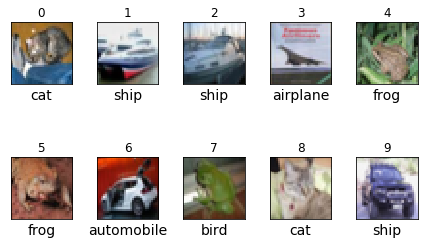

In [114]:
fig = plt.figure()

labels =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

for i in range(10):
    num=i+1  
    ax = fig.add_subplot(2,5,num)
    ax.imshow(x_test[i], cmap=plt.get_cmap('gray'))
    ax.set_title(i)
    res = model.predict(x_test[:10])
    maxindex = res[i].argmax()
    plt.xlabel(labels[maxindex], fontsize = 14)
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()
plt.show()

In [92]:
res = model.predict(x_test[:2])

In [93]:
res

array([[2.1134787e-05, 1.4881557e-05, 4.9372396e-04, 7.4185175e-01,
        5.9822270e-07, 2.3131271e-01, 5.7561910e-03, 2.3665641e-05,
        2.0523261e-02, 2.0924597e-06],
       [6.1151077e-05, 4.0439796e-03, 2.2617294e-16, 9.1399249e-16,
        7.2896496e-17, 1.8513115e-20, 8.1655154e-17, 1.2175425e-20,
        9.9589491e-01, 1.0610791e-08]], dtype=float32)

In [97]:
res[1]

array([6.1151077e-05, 4.0439796e-03, 2.2617294e-16, 9.1399249e-16,
       7.2896496e-17, 1.8513115e-20, 8.1655154e-17, 1.2175425e-20,
       9.9589491e-01, 1.0610791e-08], dtype=float32)

In [99]:
maxindex = res[1].argmax()
maxindex

8

In [100]:
labels =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [102]:
labels[8]

'ship'

# Увеличение кол-ва эпох

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


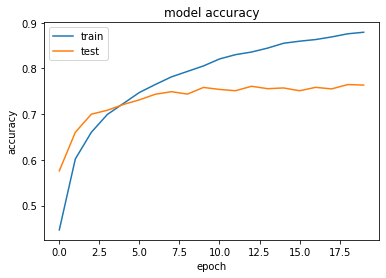

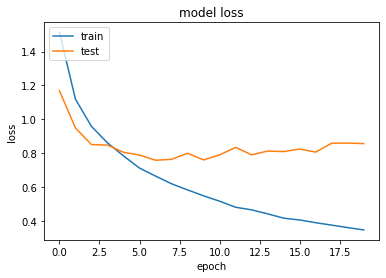

In [103]:
print(history.history.keys())

import matplotlib.pyplot as plt
import numpy as np

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [7]:
tmKR = time.time()

history = model.fit(x_train, y_train,
              epochs= 80,
              validation_data=(x_test, y_test),
              shuffle=True)

tmKR = time.time() - tmKR
print("Keras training time : {:.2f} [sec]".format(tmKR))

Epoch 1/80
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4610 - accuracy: 0.4691 - val_loss: 1.0664 - val_accuracy: 0.6212
Epoch 2/80
1563/1563 [==============================] - 5s 4ms/step - loss: 1.0651 - accuracy: 0.6197 - val_loss: 0.9443 - val_accuracy: 0.6699
Epoch 3/80
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9187 - accuracy: 0.6773 - val_loss: 0.8624 - val_accuracy: 0.6979
Epoch 4/80
1563/1563 [==============================] - 5s 4ms/step - loss: 0.8274 - accuracy: 0.7088 - val_loss: 0.7886 - val_accuracy: 0.7313
Epoch 5/80
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7625 - accuracy: 0.7320 - val_loss: 0.7628 - val_accuracy: 0.7385
Epoch 6/80
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6929 - accuracy: 0.7569 - val_loss: 0.7526 - val_accuracy: 0.7417
Epoch 7/80
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6391 - accuracy: 0.7757 - val_loss: 0.7940 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


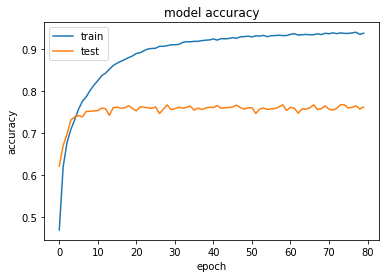

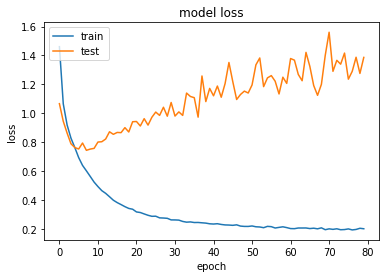

In [8]:
print(history.history.keys())

import matplotlib.pyplot as plt
import numpy as np

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

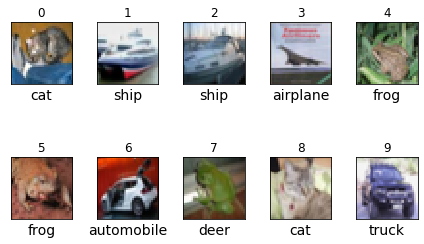

In [9]:
fig = plt.figure()

labels =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

for i in range(10):
    num=i+1  
    ax = fig.add_subplot(2,5,num)
    ax.imshow(x_test[i], cmap=plt.get_cmap('gray'))
    ax.set_title(i)
    res = model.predict(x_test[:10])
    maxindex = res[i].argmax()
    plt.xlabel(labels[maxindex], fontsize = 14)
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()
plt.show()

# 6 слоев

In [10]:
start = time.time()

(x_train, y_train), (x_test, y_test) = cifar10.load_data() # fetch CIFAR-10 data

num_classes = np.unique(y_train).shape[0] # there are 10 image classes
x_train=x_train.astype('float32')
x_train/=255
y_train = utils.to_categorical(y_train,  num_classes)

x_test=x_test.astype('float32')
x_test/=255
y_test = utils.to_categorical(y_test,  num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding = 'same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3),padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
          
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(256, kernel_size=(3, 3),padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.25))
          
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

sgd = SGD(learning_rate = 0.1, momentum = 0.9, nesterov = True)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# Арихитектура нейронной сети
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_4 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
activation_5 (Activation)    (None, 15, 15, 64)       

In [12]:
tmKR = time.time()

history = model.fit(x_train, y_train,
              epochs= 20,
              validation_data=(x_test, y_test),
              shuffle=True)

tmKR = time.time() - tmKR
print("Keras training time : {:.2f} [sec]".format(tmKR))

Epoch 1/20
1563/1563 [==============================] - 47s 29ms/step - loss: 1.9598 - accuracy: 0.2527 - val_loss: 1.5050 - val_accuracy: 0.4507
Epoch 2/20
1563/1563 [==============================] - 46s 29ms/step - loss: 1.4306 - accuracy: 0.4769 - val_loss: 1.2651 - val_accuracy: 0.5640
Epoch 3/20
1563/1563 [==============================] - 46s 29ms/step - loss: 1.2286 - accuracy: 0.5592 - val_loss: 1.1066 - val_accuracy: 0.6097
Epoch 4/20
1563/1563 [==============================] - 46s 29ms/step - loss: 1.1060 - accuracy: 0.6084 - val_loss: 1.0535 - val_accuracy: 0.6347
Epoch 5/20
1563/1563 [==============================] - 46s 30ms/step - loss: 1.0212 - accuracy: 0.6410 - val_loss: 0.9339 - val_accuracy: 0.6690
Epoch 6/20
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9596 - accuracy: 0.6604 - val_loss: 0.9081 - val_accuracy: 0.6764
Epoch 7/20
1563/1563 [==============================] - 46s 29ms/step - loss: 0.9142 - accuracy: 0.6801 - val_loss: 0.8399 -

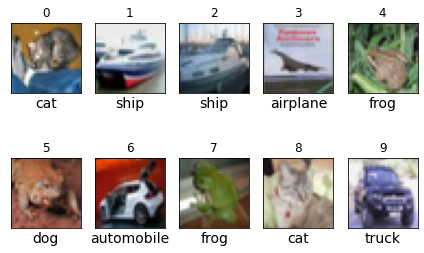

In [13]:
fig = plt.figure()

labels =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

for i in range(10):
    num=i+1  
    ax = fig.add_subplot(2,5,num)
    ax.imshow(x_test[i], cmap=plt.get_cmap('gray'))
    ax.set_title(i)
    res = model.predict(x_test[:10])
    maxindex = res[i].argmax()
    plt.xlabel(labels[maxindex], fontsize = 14)
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


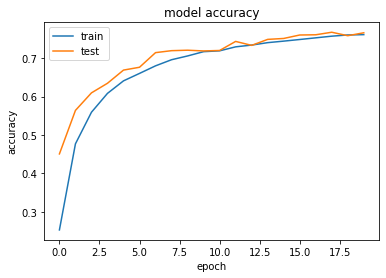

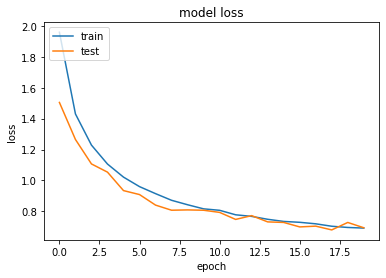

In [14]:
print(history.history.keys())

import matplotlib.pyplot as plt
import numpy as np

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [143]:
tmKR = time.time()

history = model.fit(x_train, y_train,
              epochs= 120,
              validation_data=(x_test, y_test),
              shuffle=True)

tmKR = time.time() - tmKR
print("Keras training time : {:.2f} [sec]".format(tmKR))

Epoch 1/120
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5934 - accuracy: 0.8023 - val_loss: 0.6596 - val_accuracy: 0.7931
Epoch 2/120
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5920 - accuracy: 0.8032 - val_loss: 0.7144 - val_accuracy: 0.7805
Epoch 3/120
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5885 - accuracy: 0.8032 - val_loss: 0.6814 - val_accuracy: 0.7813
Epoch 4/120
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5922 - accuracy: 0.8029 - val_loss: 0.6630 - val_accuracy: 0.7945
Epoch 5/120
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5826 - accuracy: 0.8051 - val_loss: 0.6615 - val_accuracy: 0.7937
Epoch 6/120
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5797 - accuracy: 0.8056 - val_loss: 0.7048 - val_accuracy: 0.7824
Epoch 7/120
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5865 - accuracy: 0.8030 - val_loss: 0.6974 - val_ac

1563/1563 [==============================] - 6s 4ms/step - loss: 0.6074 - accuracy: 0.8055 - val_loss: 0.6395 - val_accuracy: 0.8052
Epoch 114/120
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5773 - accuracy: 0.8155 - val_loss: 0.7604 - val_accuracy: 0.7758
Epoch 115/120
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5913 - accuracy: 0.8110 - val_loss: 0.7354 - val_accuracy: 0.7736
Epoch 116/120
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5635 - accuracy: 0.8185 - val_loss: 0.6924 - val_accuracy: 0.7984
Epoch 117/120
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5768 - accuracy: 0.8147 - val_loss: 0.7039 - val_accuracy: 0.7940
Epoch 118/120
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5800 - accuracy: 0.8129 - val_loss: 0.7634 - val_accuracy: 0.8011
Epoch 119/120
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6009 - accuracy: 0.8086 - val_loss: 0.8031 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


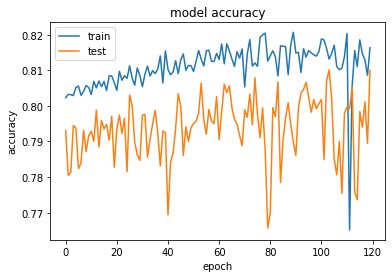

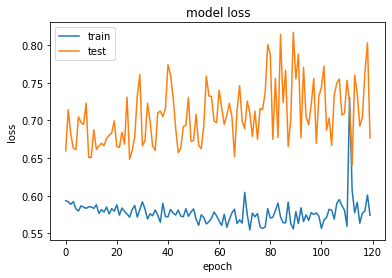

In [144]:
print(history.history.keys())

import matplotlib.pyplot as plt
import numpy as np

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [145]:
pr_Hist=pd.DataFrame.from_dict(history.history)
pr_Hist.tail(10)

,loss,accuracy,val_loss,val_accuracy
110,0.559244,0.82032,0.753286,0.7997
111,0.730655,0.76516,0.722990,0.7992
112,0.607422,0.80554,0.639508,0.8052
113,0.577345,0.81554,0.760401,0.7758
114,0.591271,0.81102,0.735391,0.7736
115,0.563469,0.81854,0.692391,0.7984
116,0.576780,0.81466,0.703853,0.7940
117,0.579984,0.81290,0.763438,0.8011
118,0.600916,0.80860,0.803139,0.7895
119,0.574022,0.81632,0.676709,0.8100


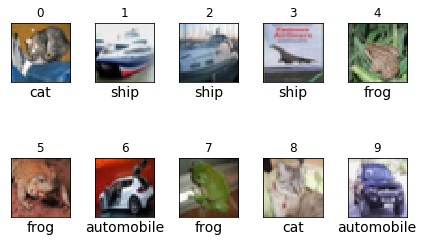

In [146]:
fig = plt.figure()

labels =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

for i in range(10):
    num=i+1  
    ax = fig.add_subplot(2,5,num)
    ax.imshow(x_test[i], cmap=plt.get_cmap('gray'))
    ax.set_title(i)
    res = model.predict(x_test[:10])
    maxindex = res[i].argmax()
    plt.xlabel(labels[maxindex], fontsize = 14)
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


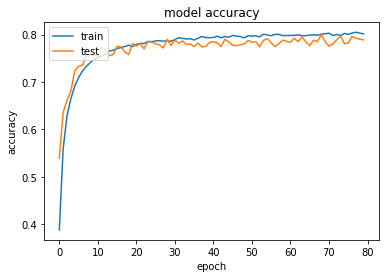

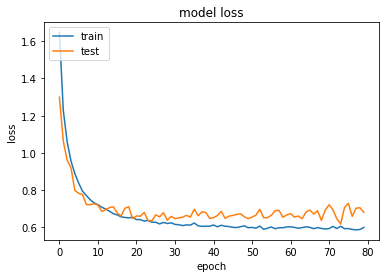

In [141]:
print(history.history.keys())

import matplotlib.pyplot as plt
import numpy as np

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [142]:
import pandas as pd
import numpy as np

pr_Hist=pd.DataFrame.from_dict(history.history)
pr_Hist.tail(10)

,loss,accuracy,val_loss,val_accuracy
70,0.593733,0.80290,0.721682,0.7755
71,0.605558,0.79798,0.693989,0.7802
72,0.593825,0.80006,0.646612,0.7890
73,0.606205,0.79816,0.618257,0.7966
74,0.593128,0.80228,0.707478,0.7810
75,0.593759,0.80048,0.729551,0.7820
76,0.589379,0.80304,0.659050,0.7963
77,0.586547,0.80486,0.703276,0.7923
78,0.588991,0.80312,0.705723,0.7903
79,0.599589,0.80118,0.681157,0.7887


In [ ]:
https://machinelearningmastery.com/object-recognition-convolutional-neural-networks-keras-deep-learning-library/
https://habr.com/ru/company/wunderfund/blog/314872/
https://appliedmachinelearning.blog/2018/03/24/achieving-90-accuracy-in-object-recognition-task-on-cifar-10-dataset-with-keras-convolutional-neural-networks/